# Actividad 3 
### Ana Luisa Espinoza López
**Expediente: 734753**

# Programación lineal

> La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Linear_Programming_Feasible_Region.svg/2000px-Linear_Programming_Feasible_Region.svg.png" width="400px" height="125px" />

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/3dpoly.svg/220px-3dpoly.svg.png" width="350px" height="125px" />


**Referencias:**
- https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal
- https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html
- http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf 

## 1. Apuntes históricos

<img style="float: right" src="https://upload.wikimedia.org/wikipedia/commons/5/5e/JohnvonNeumann-LosAlamos.gif" width="200px" height="125px" />


- 1826:	Joseph Fourier anticipa la programación lineal. Carl Friedrich Gauss resuelve ecuaciones lineales por eliminación "gaussiana".
- 1902:	Gyula Farkas concibe un método para resolver sistemas de inecuaciones.
- Es hasta la Segunda Guerra Mundial que se plantea la programación lineal como un modelo matemático para planificar gastos y retornos, de modo que se reduzcan costos de guerra y aumentar pérdidas del enemigo. Secreto hasta 1947 (posguerra).
- 1947:	George Dantzig publica el algoritmo simplex y John von Neumann desarrolló la teoría de la dualidad. Se sabe que Leonid Kantoróvich también formuló la teoría en forma independiente.
- Fue usado por muchas industrias en la planificación diaria.

**Hasta acá, tiempos exponenciales de solución. Lo siguiente, tiempo polinomial.**

- 1979: Leonid Khachiyan, diseñó el llamado Algoritmo del elipsoide, a través del cual demostró que el problema de la programación lineal es resoluble de manera eficiente, es decir, en tiempo polinomial.
- 1984: Narendra Karmarkar introduce el método del punto interior para resolver problemas de programación lineal.

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Simplex-description-en.svg/240px-Simplex-description-en.svg.png" width="200px" height="125px" />

 $$ y \geq 3x + 4 $$

## 2. Problemas de programación lineal

### 2.1. Ejemplo básico
Una multinacional farmacéutica desea fabricar un compuesto nutritivo a base de dos productos A y B.  El producto A contiene  $30\%$ de proteínas,  un $1\%$ de grasas y un  $10\%$ de azúcares.  El producto B  contiene  un  $5\%$  de proteínas,  un  $7\%$ de grasas  y un  $10\%$  de  azúcares.

El compuesto debe de tener,  al menos, $25g$ de proteínas,  $6g$ de grasas y $30g$ de azúcares.  El coste del producto A es de $0.6$ u.m./g  y el de B es de $0.2$  u.m./g

Se desea encontrar la cantidad en gramos de cada producto para que el coste total sea mínimo.

Formular el problema de decidir cuánto hacer de cada producto como un problema de programación lineal.

#### Solución
1. Minimizar
2. Variables
    - Xa -> cantidad en gramos de producto A
    - Xb -> cantidad en gramos de producto B
    - ¿Sobre qué tengo control? cantidad de proteína, grasa y azúcar
3. Función de costo
    - $0.6x_a+0.2x_b$
4. Información adicional
    - $0.3x_a+0.05x_b \geq 25$
    - $0.01x_a+0.07x_b \geq 6$
    - $0.1x_a+0.1x_b \geq30$
5. Reescribir usando factores del paso 2
    

**Solución gráfica:**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

¿Qué queremos graficar?
$$0.3x_a+0.05x_b \geq 25$$
$$0.0.1x_a+0.07x_b \geq 6$$
$$0.1x_a+0.1x_b \geq 30$$

Despejamos para tener una variable dependiente y una independiente. $x_b$ será dependiente de $x_a$

Primer restricción despejada:
$$ x_b \geq \frac{25-0.3 x_a}{0.05}$$

Segunda restricción despejada:
$$ x_b \geq \frac{6-0.01 x_a}{0.07}$$

Tercera restricción despejada:
$$x_b \geq \frac{30-0.1x_a}{0.1}$$

(0, 500)

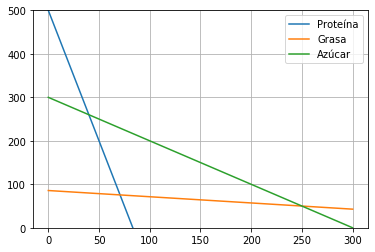

In [2]:
%matplotlib inline

xA = np.linspace(0,300,100)

y_r1=(25-0.3*xA)/0.05
y_r2=(6-0.01*xA)/0.07
y_r3=(30-0.1*xA)/0.1

plt.figure()
plt.plot(xA,y_r1,label="Proteína")
plt.plot(xA,y_r2,label="Grasa")
plt.plot(xA,y_r3,label="Azúcar")
plt.legend(loc="best")
plt.grid()
plt.ylim([0,500])

Las combinaciones que satisfazcan las restricciones deben estar por encima de todas las curvas, las mejores soluciones serán los vértices que se encuentran en esta zona.

In [3]:
sp.var("x")

r1=(25-0.3*x)/0.05
r2=(6-0.01*x)/0.07
r3=(30-0.1*x)/0.1

In [4]:
xa=sp.solve(r1-r3,x)[0] #cruce entre r1 y r3, vértice de la izquierda
xb=r1.subs(x,xa)
(xa,xb)

(40.0000000000000, 260.000000000000)

In [5]:
xa=sp.solve(r2-r3,x)[0] #cruce entre r2 y r3, vértice de la derecha
xb=r2.subs(x,xa)
(xa,xb)

(250.000000000000, 50.0000000000000)

In [6]:
def funcion_de_costo(xa,xb):
    return 0.6*xa+0.2*xb
funcion_de_costo(40, 260)

76.0

In [7]:
funcion_de_costo(250,50)

160.0

**SOLUCIÓN**

Para minimizar el costo del producto con un costo total de \$76 .

La proporción de $x_a$ debe ser de 40 gramos y 260 gramos de $x_b$.

**SOLUCIÓN CON LINPROG**

In [16]:
import numpy as np

c = np.array([0.6, 0.2])
Aub = np.array([[-0.30,-0.05],
                [-0.01,-0.07],
                [-0.10,-0.10]])
bub=np.array([-25, -6, -30])

opt.linprog(c,Aub,bub)

     con: array([], dtype=float64)
     fun: 76.00000000328913
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([9.16848819e-10, 1.26000000e+01, 1.51847956e-09])
  status: 0
 success: True
       x: array([ 40.        , 260.00000001])

**SOLUCIÓN**

Para minimizar el costo del producto con un costo total de \$76 .

La proporción de $x_a$ debe ser de 40 gramos y 260 gramos de $x_b$.

### 2.2. Ejemplo básico 2
Una  fábrica  de  carrocerías  de  automóviles  y camiones  tiene  dos naves. 

+ En  la nave A,  para  hacer  la  carrocería  de  un  camión,  se  invierten  siete  días-operario,  para  fabricar  la  de  un  coche  se  precisan dos días-operario.

+ En la nave B se invierten tres días operario tanto en carrocerías de camión como de coche. 

Por limitaciones de mano de obra y maquinaria, la nave A dispone de $300$ días operario, y la nave B de $270$ días-operario.

Si los beneficios que se obtienen por cada camión son de $600$ u.m y por  cada  automóvil  $200$ u.m,  ¿cuántas  unidades  de  cada  uno  se deben  producir  para maximizar las  ganancias? 

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

**Solución sin SciPy

1. Criterio de optimización
    - Maximizar
2. Identificar variables
    - x(autos) y(camiones)
3. Función de costo
    - $200x+600y$
4. Información adicional
   - 2x+7y=300 (Nave A)
   - 3x+3y=270 (Nave B)

Despejar ecuaciones en función de x:
$$y=\frac{300-2x}{7}$$

$$y=\frac{270-3x}{3}$$

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

(0, 100)

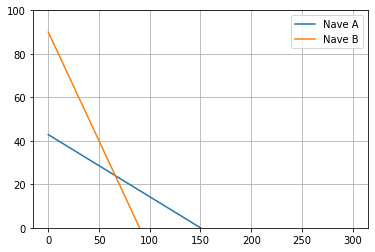

In [9]:
%matplotlib inline

xn=np.linspace(0,300,100)
a=(300-2*xn)/7
b=(270-3*xn)/3

plt.figure()
plt.plot(xn,a,label="Nave A")
plt.plot(xn,b,label="Nave B")
plt.legend(loc="best")
plt.grid()
plt.ylim([0,100])


In [10]:
sp.var("x")
a=(300-2*x)/7
b=(270-3*x)/3

In [11]:
auto=sp.solve(a-b,x)[0] #cruce entre r1 y r3, vértice de la izquierda
camion=a.subs(x,auto)
(auto,camion)

(66, 24)

In [12]:
#VERIFICACIÓN RESTRICCIÓN DE DÍAS
NAVE_A=2*auto+7*camion
NAVE_B=3*auto+3*camion
(NAVE_A,NAVE_B)

(300, 270)

In [13]:
def funcion_costo(x,y):
    return 200*x+600*y
funcion_costo(auto,camion)

27600

**Respuesta:**

Para maximizar ganancias con \$27600, se deben producir 66 automóviles y 24 camiones. 

**Resolviendo el problema 2 (Maximización de utilidad en carros y camiones), con la función `linprog`**

In [22]:
import scipy.optimize as opt

In [24]:
c=np.array([-200,-600])
A=np.array([[2,7],
           [3,3]])
b=np.array([300,270])
opt.linprog(c,A,b)

     con: array([], dtype=float64)
     fun: -27599.9999995495
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([4.92059371e-09, 4.26388169e-09])
  status: 0
 success: True
       x: array([66., 24.])

**ANÁLISIS DE RESULTADOS**

Se cambiaron los signos de la función de costo para expresarla como un mínimo. La matriz A representa las reestricciones de días operarios de cada Nave para producir tanto autos como camiones. Asimismo, la matriz b tiene los días operarios máximos que cada nave dispone para producir.

**Solución**

Para maximizar las ganancias con \$27600, se deben producir 66 automóviles y 24 camiones.

## 3. ¿Cómo se resuelve en python?

### 3.1 Librería `SciPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://scipy.org/_static/images/scipy_med.png" width="200px" height="75px" />

`SciPy` es un software de código abierto basado en `Python` para matemáticas, ciencia e ingeniería. 

La **Librería `SciPy`** es uno de los paquetes principales y provee varias rutinas numéricas eficientes. Entre ellas, para integración numérica y optimización.

En esta clase, y en lo que resta del módulo, estaremos utilizando el módulo `optimize` de la librería `SciPy`.

**Importémoslo**

In [14]:
import scipy.optimize as opt

# Importar el módulo optimize de la librería scipy

El módulo `optimize` que acabamos de importar contiene varias funciones para optimización y búsqueda de raices. Entre ellas se encuentra la función `linprog`

---

In [15]:
import scipy.optimize as opt

In [17]:
opt.linprog?

**Actividad.** Mónica hace aretes y cadenitas de joyería. Es tan buena, que todo lo que hace lo vende.

Le toma 30 minutos hacer un par de aretes y una hora hacer una cadenita, y como Mónica también es estudihambre, solo dispone de 10 horas a la semana para hacer las joyas. Por otra parte, el material que compra solo le alcanza para hacer 15 unidades (el par de aretes cuenta como unidad) de joyas por semana.

La utilidad que le deja la venta de las joyas es $\$15$ en cada par de aretes y $\$20$ en cada cadenita.

¿Cuántos pares de aretes y cuántas cadenitas debería hacer Mónica para maximizar su utilidad?

Formular el problema en la forma explicada y obtener la solución gráfica (puede ser a mano).

**Diez minutos: quien primero lo haga, comparte pantalla para explicarlo y le subiré la nota de alguna tarea a 100.**

1. Criterio de optimización
    - Maximizar
2. Identificar variables
    - $x_1$(par aretes) 
    - $x_2$(cadenas)
3. Función de costo
    - $15x_1+20x_2$
4. Información adicional
   - $30x_1+60x_2\leq600$ (Tiempo en minutos)
   - $x_1+x_2\leq15$ (Material)

**Función de costo**
$$\min_{x_1,x_2} -15x_1-20x_2$$
Este será el vector c



Para la matriz Aub se incluyó la información adicional del tiempo y el material. 
Para el tiempo, se colocó en la primera columna el tiempo para los aretes, en la segunda columna para la cadena; se colocó la información para ambos en minutos, por lo tanto, 1 hora se toma como 60 minutos. 
El primer renglón de la matriz es: [30, 60].

A continuación, la cantidad máxima es de 15 unidades de joyería, se menciona que cada par de aretes es una unidades, entonces la suma de unidades de aretes y de cadenas debe ser igual a 15, entonces el segundo renglón queda de la siguiente forma: [1,1]

La matriz resultante es:

[[30, 60]

[ 1,  1]]







Por último la matriz bub contiene los límites de las reestricciones de tiempo y material. El tiempo máximo son 10 horas, el equivalente en minutos es 600 minutos, este será el primer elemento de la matriz. El segundo elemento es el máximo de unidades, entonces el segundo elemento del renglón es 15. La matriz bub queda así:
[600, 15]


Se cambian los signos de lo que afecte a la función de costo. La función de costo si es un máximo, se cambia el signo para plantearse como mínimo. Si las reestricciones están como menor o igual su signo queda igual, si es mayor o igual debe cambiar su signo.

Las reestricciones no se deben mover porque están planteadas como menor o igual

In [18]:
c = np.array([-15, -20])
Aub=np.array([[30, 60],[1,1]])
bub=np.array([600,15])
opt.linprog(c,Aub,bub)

     con: array([], dtype=float64)
     fun: -249.9999999887525
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([2.68149734e-08, 6.77832901e-10])
  status: 0
 success: True
       x: array([10.,  5.])

### SOLUCIÓN

Para maximizar sus ganancias con \$250.00, debe de vender 10 pares de aretes y 5 cadenas

## 4. Problema de transporte 1
- **Referencia**: http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf

Una  empresa tiene dos fábricas A y B.  En ellas  se fabrica un determinado  producto, a razón de 500  y 400 unidades por día respectivamente.  El producto  ha  de  ser distribuido posteriormente  a  tres  centros  C,  D  y  E,  que  requieren,  respectivamente,  200,  300  y  400  unidades.  Los  costos  de  transportar cada unidad del producto desde cada fábrica a cada centro distribuidor son los  indicados  en la tabla  siguiente: 

Factoría|C|D|E|Fabricación (Unidades)
:----|----|----|----|----
A|  50 u.m|60 u.m|10 u.m|500 u
B|  25 u.m|40 u.m|20 u.m|400 u
Demanda|200|300|400|

**¿De qué manera  deben  organizar  el transporte a fin de que los gastos sean mínimos?**


Formulemos el problema para ser resuelto por la programación lineal con
- $x_1$: unidades transportadas de la factoría "A" al centro "C"
- $x_2$: unidades transportadas de la factoría "A" al centro "D"
- $x_3$: unidades transportadas de la factoría "A" al centro "E"
- $x_4$: unidades transportadas de la factoría "B" al centro "C"
- $x_5$: unidades transportadas de la factoría "B" al centro "D"
- $x_6$: unidades transportadas de la factoría "B" al centro "E"

se tienen las siguientes ecuaciones:

Restricciones de la producción:

- $x_{AC} + x_{AD} + x_{AE} \leq 500$
- $x_{BC} + x_{BD} + x_{BE} \leq 400$

Restricciones del consumo:

- $x_{AC} + x_{BC} \geq 200$
- $x_{AD} + x_{BD} \geq 300$
- $x_{AE} + x_{BE} \geq 400$

La función objetivo será:

$$\min_{x_1,\dots,x_6}50x_{AC} + 60x_{AD} + 10x_{AE} + 25x_{BC} + 40x_{BD} + 20x_{BE}$$

Resolver con `linprog`

In [21]:
c=np.array([50,60,10,25,40,20])
A=np.array([[1,1,1,0,0,0],
            [0,0,0,1,1,1],
            [-1,0,0,-1,0,0],
            [0,-1,0,0,-1,0],
            [0,0,-1,0,0,-1]])
b=np.array([500,400,-200,-300,-400])
opt.linprog(c,A,b)

C:\Users\analo\anaconda3\lib\site-packages\ipykernel_launcher.py:8: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  
C:\Users\analo\anaconda3\lib\site-packages\ipykernel_launcher.py:8: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  


     con: array([], dtype=float64)
     fun: 22999.999998547595
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([ 3.13205533e-08,  2.50977905e-08, -1.26535156e-08, -1.90470928e-08,
       -2.47177354e-08])
  status: 0
 success: True
       x: array([5.36843546e-12, 1.00000000e+02, 4.00000000e+02, 2.00000000e+02,
       2.00000000e+02, 1.67428498e-10])

In [26]:
c=np.array([50,60,10,25,40,20])
Aub=np.array([[1,1,1,0,0,0],
            [0,0,0,1,1,1]])

bub=np.array([500,400])
Aeq=np.array([[1,0,0,1,0,0],
              [0,1,0,0,1,0],
              [0,0,1,0,0,1]])
beq=np.array([200,300,400])
opt.linprog(c,Aub,bub,Aeq,beq)

     con: array([8.53129493e-05, 1.28400299e-04, 1.71487643e-04])
     fun: 22999.99019801425
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([0.00021417, 0.00017103])
  status: 0
 success: True
       x: array([7.43293041e-08, 9.99999584e+01, 3.99999827e+02, 1.99999915e+02,
       1.99999913e+02, 1.16778047e-06])

**ANÁLISIS**

La matriz A tiene 6 columnas, correspondientes a sus 6 variables y 5 renglones, correspondientes a cada reestricción. Los renglones de la matriz que corresponden a los requerimientos de cada centro se cambiaron de signo porque las reestricciones eran de mayor o igual y se deben de plantear como mínimo. Lo mismo sucede en el vector b, los últimos 3 valores tienen signo contrario. 

**SOLUCIÓN**

El costo mínimo fue de \$23,000 pesos.
La factoría A enviará 100 unidades al centro D y 400 unidades al centro E.
La factoría B enviará 200 unidades al centro C y 200 al centro D. 

Se cumplen las reestricciones de unidades máximas de Factoría A con 500 y de la factoría B con 400. También se cumplen las reestricciones de demanda de cada centro, el C con 200 unidades, el D con 300 y el E con 400. 

## 5. Optimización de inversión en bonos

**Referencia:**

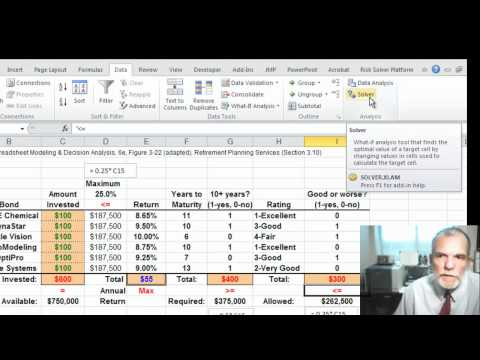

In [20]:
from IPython.display import YouTubeVideo
YouTubeVideo('gukxBus8lOs')

El objetivo de este problema es determinar la mejor estrategia de inversión, dados diferentes tipos de bono, la máxima cantidad que puede ser invertida en cada bono, el porcentaje de retorno y los años de madurez. También hay una cantidad fija de dinero disponible ($\$750,000$). Por lo menos la mitad de este dinero debe ser invertido en bonos con 10 años o más para la madurez. Se puede invertir un máximo del $25\%$ de esta cantidad en cada bono. Finalmente, hay otra restricción que no permite usar más de $35\%$ en bonos de alto riesgo.

Existen seis (6) opciones de inversión con las letras correspondientes $A_i$

1. $A_1$:(Tasa de retorno=$8.65\%$; Años para la madurez=11, Riesgo=Bajo)
1. $A_2$:(Tasa de retorno=$9.50\%$; Años para la madurez=10, Riesgo=Alto)
1. $A_3$:(Tasa de retorno=$10.00\%$; Años para la madurez=6, Riesgo=Alto)
1. $A_4$:(Tasa de retorno=$8.75\%$; Años para la madurez=10, Riesgo=Bajo)
1. $A_5$:(Tasa de retorno=$9.25\%$; Años para la madurez=7, Riesgo=Alto)
1. $A_6$:(Tasa de retorno=$9.00\%$; Años para la madurez=13, Riesgo=Bajo)

Lo que se quiere entonces es maximizar el retorno que deja la inversión.

Este problema puede ser resuelto con programación lineal. Formalmente, puede ser descrito como:

$$\max_{A_1,A_2,...,A_6}\sum^{6}_{i=1} A_iR_i,$$

donde $A_i$ representa la cantidad invertida en la opción, y $R_i$ representa la tasa de retorno respectiva.

1. Criterio de optimización
    - Maximizar    
2. Variables
    - $A_i$ es la cantidad invertida en cada opción      
3. Función de costo
    - $0.0865A_1+0.095A_2+0.1A_3+0.0875A_4+0.0925A_5+0.09A_6$    
4. Información adicional
    - $A_1+A_2+A_4+A_6 \geq 375000$  
    (bonos con 10 o más años de madurez)
    - $A_1+A_2+A_3+A_4+A_5+A_6=750000$ 
    
    (cantidad máxima a invertir en total)
    - $A_2+A_3+A_5\leq 262500$ 
    
    (se debe de invertir máximo el 35% en bonos de alto riesgo)
    
    - Todos los bonos deben tener inversión menor o igual al 25% de la inversión total:  
    - $A_1 \leq 187500$ 
    - $A_2 \leq 187500$
    - $A_3 \leq 187500$
    - $A_4 \leq 187500$
    - $A_5 \leq 187500$
    - $A_6 \leq 187500$


In [27]:
import scipy.optimize as opt
import numpy as np

In [33]:
c=np.array([-0.0865,-0.095,-0.1,-0.0875,-0.0925,-0.09])
Aub=np.array([[-1,-1,0,-1,0,-1],
              [1,1,1,1,1,1],
              [0,1,1,0,1,0],
              [1,0,0,0,0,0],
              [0,1,0,0,0,0],
              [0,0,1,0,0,0],
              [0,0,0,1,0,0],
              [0,0,0,0,1,0],
              [0,0,0,0,0,1]])
bub=np.array([-375000,750000,262500,187500,187500,187500,187500,187500,187500])
opt.linprog(c,Aub,bub)

     con: array([], dtype=float64)
     fun: -68887.49999256019
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([1.87500000e+05, 4.34913673e-05, 8.75809928e-05, 7.49999997e+04,
       1.12500000e+05, 3.19572398e-04, 2.36914493e-05, 1.87500000e+05,
       2.06608034e-04])
  status: 0
 success: True
       x: array([1.12500000e+05, 7.50000000e+04, 1.87500000e+05, 1.87500000e+05,
       2.35473619e-04, 1.87500000e+05])

**ANÁLISIS**

El vector c tiene los porcentajes de retorno de cada tasa en valores numéricos. Se utilizó una matriz de 9x6. Se tienen 9 renglones, 1 por cada restricción y 6 columnas, una por cada variable. Se tenía una reestricción de mayor o igual, por lo que se le cambió el signo a los elementos del primer renglón, correspondientes a esa matriz. El vector bub tiene su primer elemento negativo por la reestricción de mayor o igual. 


**SOLUCIÓN**

Para maximizar el retorno de la inversión, con interés de \$68,887.5, se debe invertir las siguientes cantidades en cada bono:

$$A_1=\$ 112500$$
$$A_2=\$ 75000$$
$$A_3=\$ 187500$$
$$A_4=\$ 187500$$
$$A_5=\$ 0$$
$$A_6=\$ 187500$$